# Traffic Signs classification using CNN

### In this task, I will train a Deep Convolutional Neural Network to classify traffic sign images

In [1]:
#Import librairies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import random

##### The dataset consists of 43 different classes, and the images are 32 x 32 pixels

Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

In [2]:
#Import the datasets
#train set
#!!!!!!!!!!!!!!!First unzip the train file from the directory!!!!!!!!!!!!
with open('train.p', mode = 'rb') as train_data:
    train = pickle.load(train_data)

#test set
with open('test.p', mode = 'rb') as test_data:
    test = pickle.load(test_data)
    
#validation set
with open('valid.p', mode = 'rb') as valid_data:
    valid = pickle.load(valid_data)
    

In [3]:
train['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [4]:
 train['features']

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [5]:
#separate labels and features train 
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [6]:
#separate labels and features test 
X_test, y_test = test['features'], test['labels']
X_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

In [7]:
#separate labels and features validation 
X_valid, y_valid = valid['features'], valid['labels']
X_valid.shape, y_valid.shape

((4410, 32, 32, 3), (4410,))

### Visuliaze some images

<IPython.core.display.Javascript object>


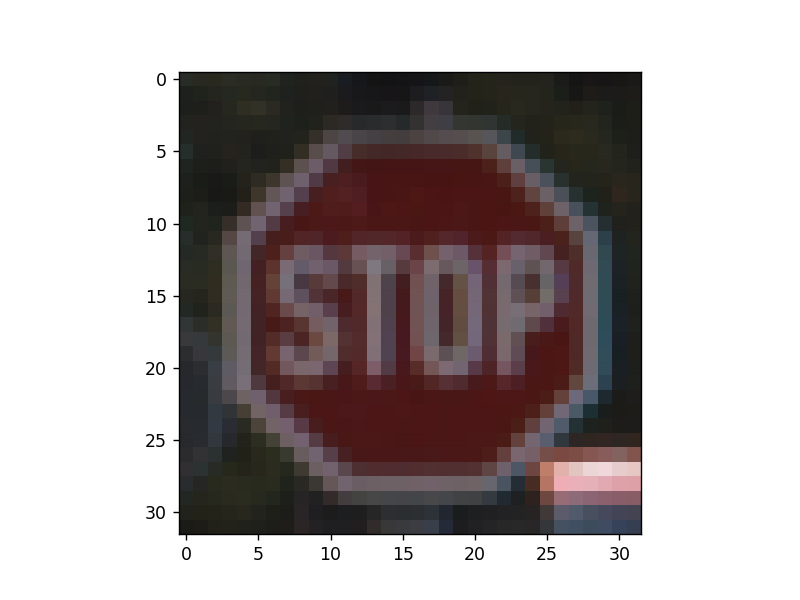

14

In [8]:
%matplotlib notebook

index = np.random.randint(len(X_train))
plt.imshow(X_train[index])
y_train[index]


<IPython.core.display.Javascript object>


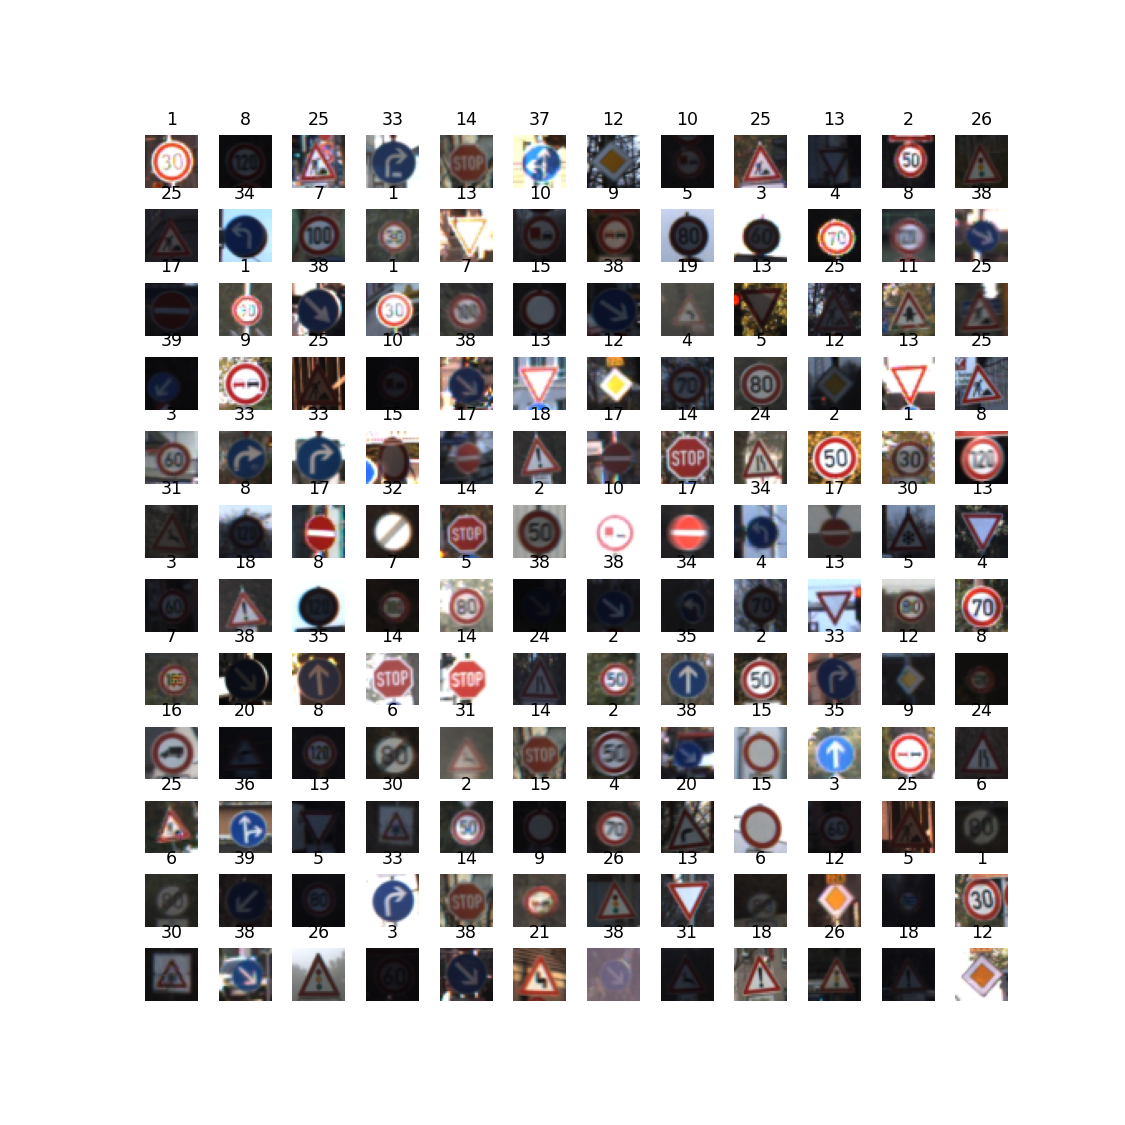

In [9]:
#More images

width_grid = 12
length_grid = 12


fig, axes = plt.subplots(length_grid, width_grid, figsize = (9, 9))
#flatten the matrix
axes = axes.ravel()  

for i in range(width_grid * length_grid):
    #index to use
    index = np.random.randint(len(X_train))
    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 10)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

### Convert images to greyscale and perform normalization

In [10]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)

In [11]:
#convert and normalize training set
X_train_grey = np.sum(X_train / 3, axis = 3, keepdims = True)
X_train_grey_norm = (X_train_grey - 128) / 128
X_train_grey_norm.shape

(34799, 32, 32, 1)

In [12]:
#convert and normalize testing set
X_test_grey = np.sum(X_test / 3, axis = 3, keepdims = True)
X_test_grey_norm = (X_test_grey - 128) / 128
X_test_grey_norm.shape

(12630, 32, 32, 1)

In [13]:
#convert and normalize validation set
X_valid_grey = np.sum(X_valid / 3, axis = 3, keepdims = True)
X_valid_grey_norm = (X_valid_grey - 128) / 128
X_valid_grey_norm.shape

(4410, 32, 32, 1)

<IPython.core.display.Javascript object>


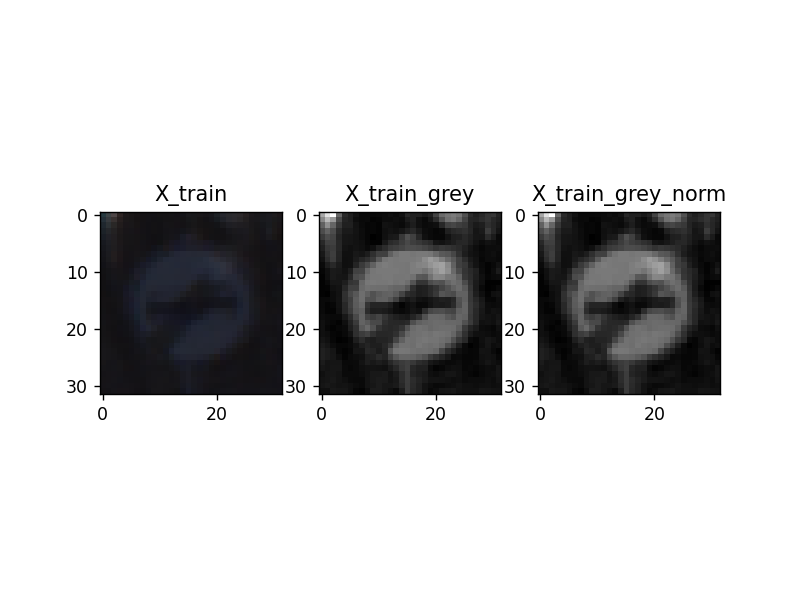

In [14]:
#just checking the 3 changements
index = random.randint(0, len(X_train))

fig, axes = plt.subplots(1, 3)

axes[0].imshow(X_train[index])
axes[0].set_title('X_train')
axes[1].imshow(X_train_grey[index], cmap = 'gray')
axes[1].set_title('X_train_grey')
axes[2].imshow(X_train_grey_norm[index], cmap = 'gray')
axes[2].set_title('X_train_grey_norm');

### Build the model

In [15]:
from tensorflow.keras import layers, models

CNN = models.Sequential()

#add the first convolutional layer with 6 filters
CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
#add a pooling layer
CNN.add(layers.AveragePooling2D())
#add a dropout layer to prevent some overfitting
CNN.add(layers.Dropout(0.2))  #drop 20% of neurons
#add a second convolutional layers with 16 filters
CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
#add another pooling layer
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())
#add a hidden layer
CNN.add(layers.Dense(120, activation = 'relu'))
#add a second hidden layer
CNN.add(layers.Dense(84, activation = 'relu'))
#the output layers with 43 classes
CNN.add(layers.Dense(43, activation = 'softmax'))

In [16]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

#### Compile and train the model

In [17]:
CNN.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = CNN.fit(X_train_grey_norm, 
                  y_train, 
                  epochs = 50, 
                  batch_size = 500, 
                  verbose = 1,
                  validation_data = (X_valid_grey_norm, y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 7s 214us/sample - loss: 3.2487 - accuracy: 0.1465 - val_loss: 2.7335 - val_accuracy: 0.2961
Epoch 2/50
34799/34799 [==============================] - 7s 203us/sample - loss: 1.8564 - accuracy: 0.4884 - val_loss: 1.6276 - val_accuracy: 0.5093
Epoch 3/50
34799/34799 [==============================] - 7s 210us/sample - loss: 1.1328 - accuracy: 0.6670 - val_loss: 1.1132 - val_accuracy: 0.6683
Epoch 4/50
34799/34799 [==============================] - 7s 201us/sample - loss: 0.8034 - accuracy: 0.7652 - val_loss: 0.8402 - val_accuracy: 0.7522
Epoch 5/50
34799/34799 [==============================] - 7s 203us/sample - loss: 0.6367 - accuracy: 0.8140 - val_loss: 0.6812 - val_accuracy: 0.8029
Epoch 6/50
34799/34799 [==============================] - 7s 204us/sample - loss: 0.5388 - accuracy: 0.8450

### CNN model performance

In [19]:
score = CNN.evaluate(X_test_grey_norm, y_test)
score

12630/12630 [==============================] - 2s 142us/sample - loss: 0.6210 - accuracy: 0.8936


[0.621045690206243, 0.8935867]

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<IPython.core.display.Javascript object>


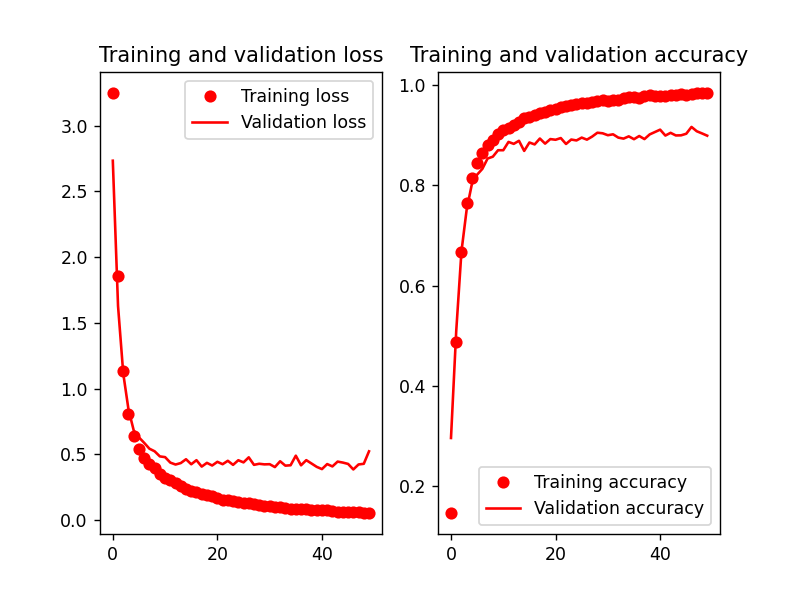

In [22]:
epochs = range(50)

fig, axes = plt.subplots(1, 2)
axes[0].plot(epochs, loss, 'ro', label = 'Training loss')
axes[0].plot(epochs, val_loss, 'r', label = 'Validation loss')
axes[0].set_title('Training and validation loss')
axes[0].legend()
axes[1].plot(epochs, accuracy, 'ro', label = 'Training accuracy')
axes[1].plot(epochs, val_accuracy, 'r', label = 'Validation accuracy')
axes[1].set_title('Training and validation accuracy')
axes[1].legend();

<IPython.core.display.Javascript object>


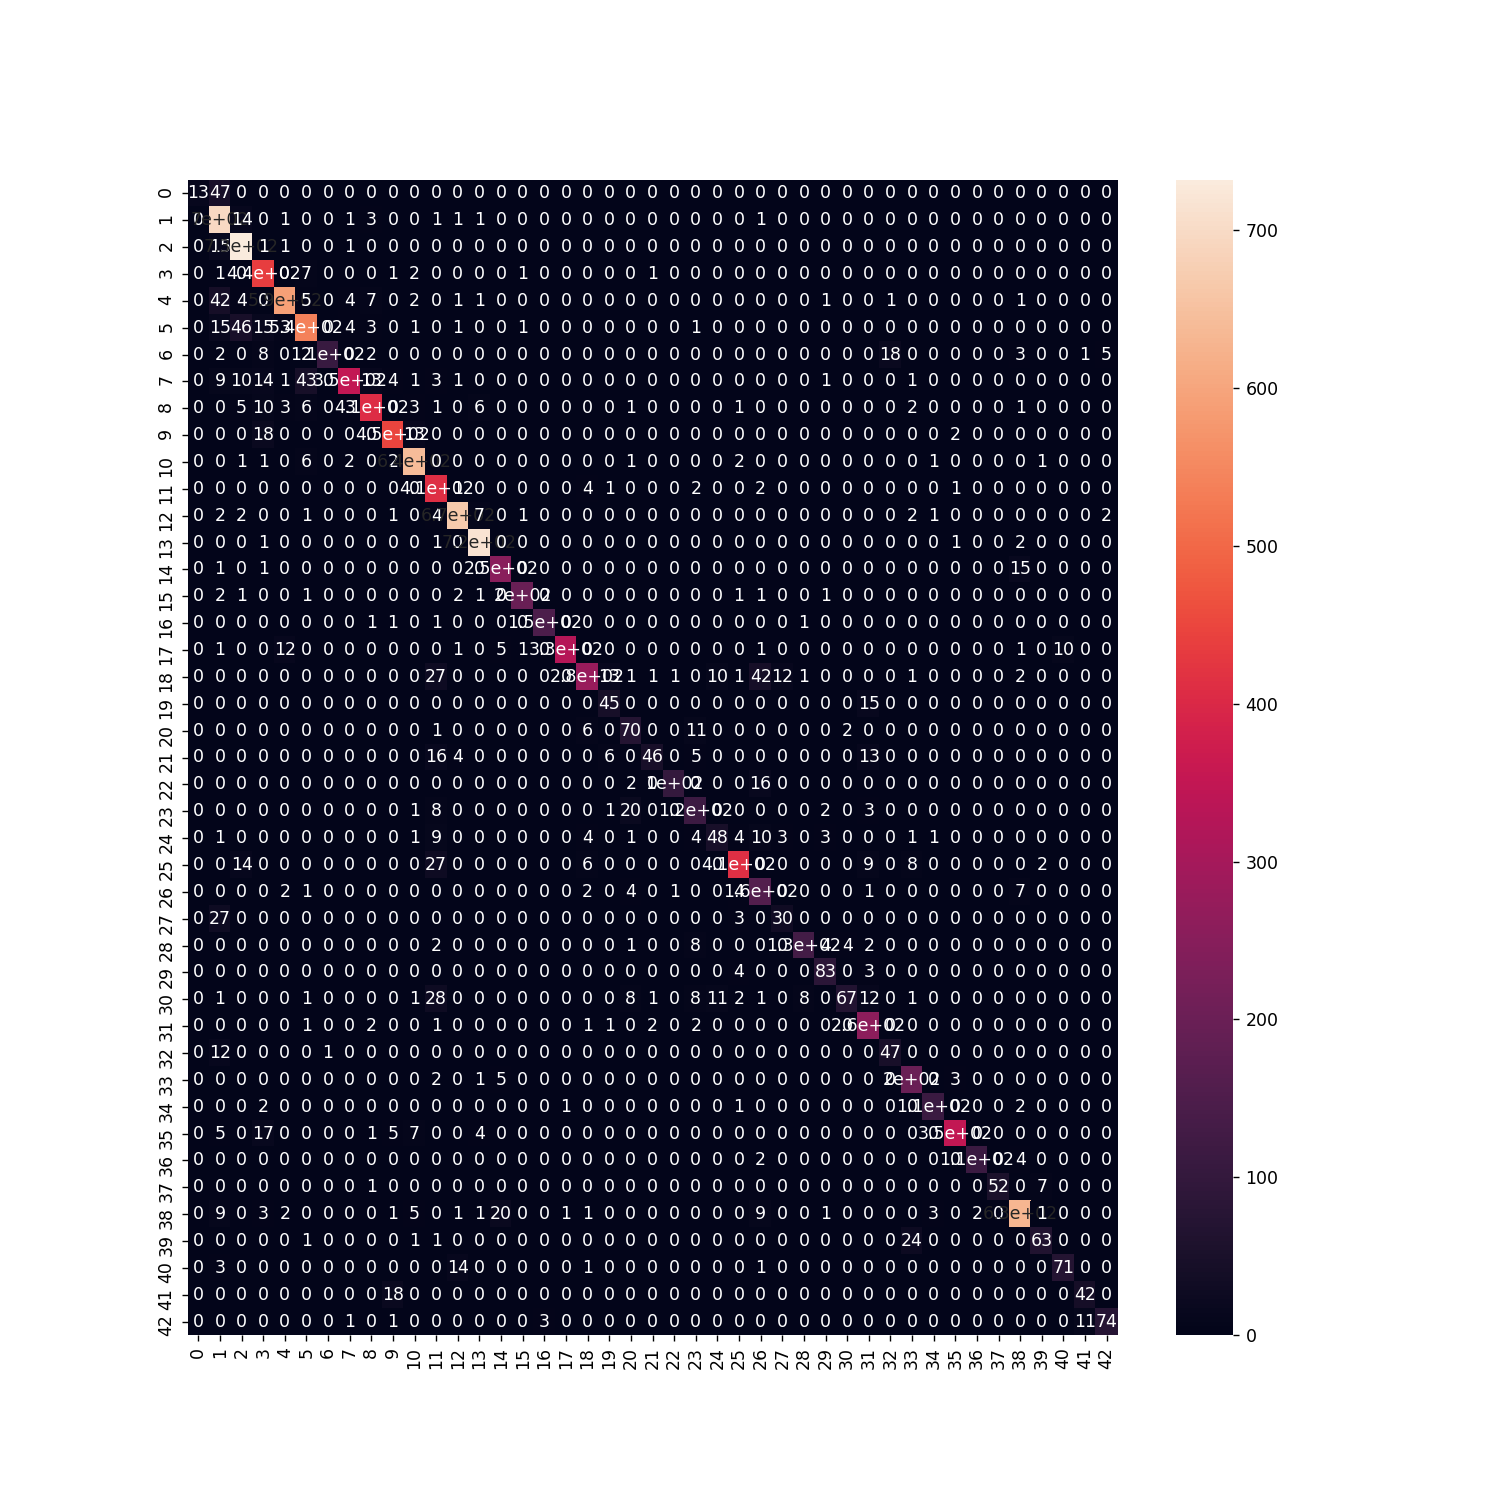

<AxesSubplot:>

In [23]:
#create a heatmap of confusion matrix
pred_classes = CNN.predict_classes(X_test_grey_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, pred_classes)
plt.figure(figsize = (12, 12))
sns.heatmap(cm, annot = True)

<IPython.core.display.Javascript object>


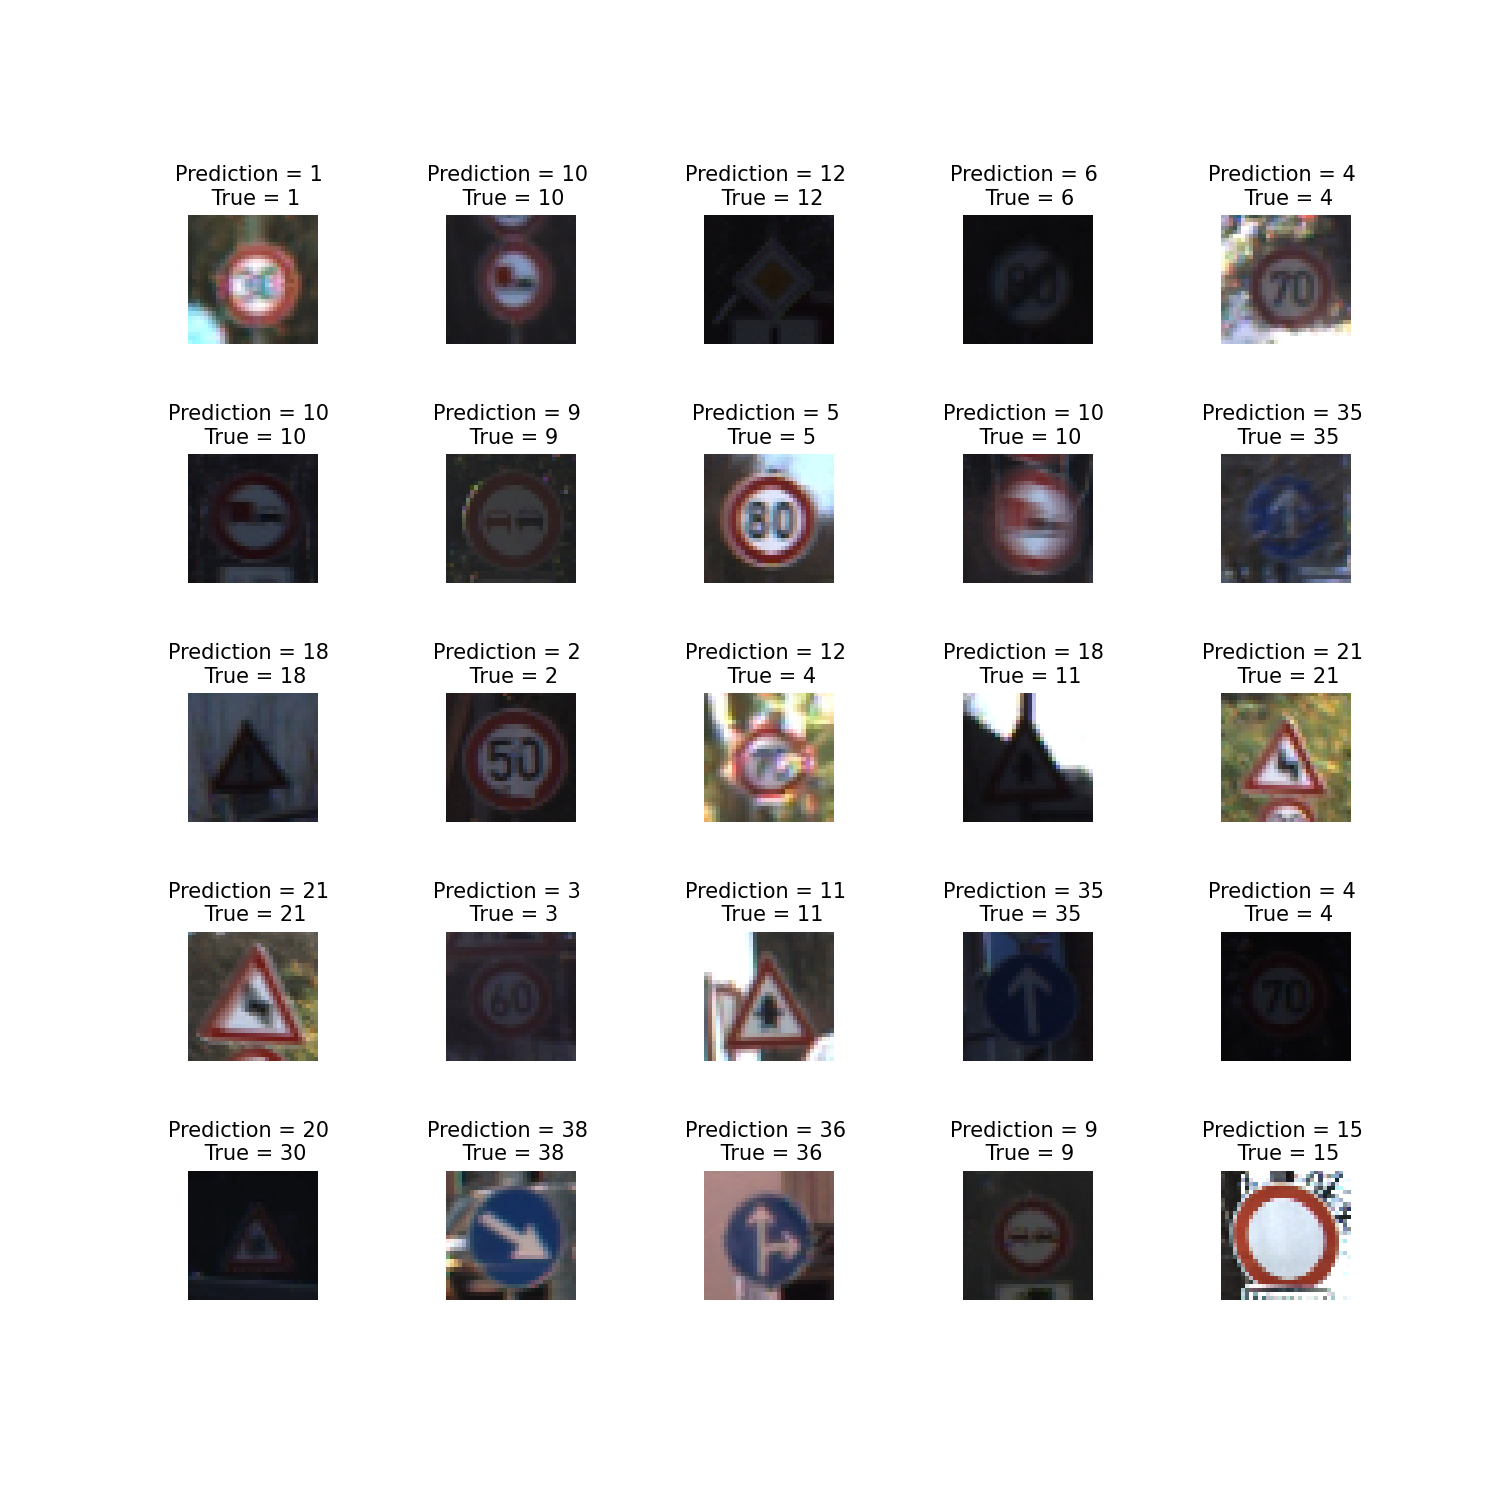

In [25]:
#plot prediction vs true classes

L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in range(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(pred_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)